# Homework Assignment - Cartoon characters

This notebook is the stub you have to fill out for the homework. Read the task description and implement the empty code cells. Each section represents a stage along implementing an image classifier from loading and inspecting the dataset to making something working. The section descriptions contain what to do in that step.


Copy this notebook to your drive (File -> Save a copy in Drive), edit it and upload the final ipynb file to [canvas.elte.hu](canvas.elte.hu). If you have your own machine with Jupyter installed, you can work there as well.

**Note** Make sure the notebook is using GPU acceleration in Edit -> Notebook settings, otherwise training and evaluation can be very slow.

## Task description
Your task is to implement a deep learning classifier of charcters from the Simpsons TV show. The dataset has benn preprocessed, each image haivng the same resolution

## Rules and Comments
- As always, copying others' code will make you fail the course automatically.
- Make sure your code can be run from an empty state (use Runtime -> Run all in the menu after restarting the notebook)
- To ease grading, please keep all outputs in the notebook before submission.
- Feel free to add more code cells as needed. Don't put code into external Python files to help the reviewing.
- Please add your name and Neptune ID in the box below for easier identification.

**Name:**  Pınar Yazgan
**Neptun ID:** FMX2HX

## Dataset preparations
First download the data and extract it:

In [1]:
# Downloading the dataset
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1QelVmKZNBwcLEwptawOKE76pTBvRGoA3" -o simpsons_dataset_train.pkl

!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1wAYMLNO2xYJbK_p6z0KAaxea2jw2mkdA" -o simpsons_dataset_test.pkl

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   3709      0 --:--:-- --:--:-- --:--:--  3709
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  129M    0  129M    0     0  62.8M      0 --:--:--  0:00:02 --:--:-- 86.4M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0    661      0 --:--:-- --:--:-- --:--:--   661
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 32.4M    0 32.4M    0     0  20.4M      0 --:--:--  0:00:01 --:--:-- 72.0M


This downloads two Python pickle files, one for the training (`simpsons_dataset_train.pkl`) and one for the test set (`simpsons_dataset_test.pkl`). Both files contain a dictionary, the key `features` holds the images, the key `labels` the label ids. You can inspect the downloaded files in the sidebar on the left, under the *Files* tab.  The following code loads the dataset:

In [2]:
import pickle
with open('simpsons_dataset_test.pkl', 'rb') as f:
    test = pickle.load(f)
with open('simpsons_dataset_train.pkl', 'rb') as f:
    train = pickle.load(f)
    
x_test, y_test = test['features'], test['labels']
x_train, y_train = train['features'], train['labels']

Notice that the original dataset does not define a validation set, you have to split it yourself. Split the training set into a training and validation set. Make sure in the validation set the classes have a similar distribution to the training set. [1p]


In [3]:
# ADD YOUR CODE HERE
# It should create the variables x_train, y_train, x_valid, y_valid
# The training and validation set must be disjoint

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val= train_test_split(x_train, y_train, test_size=0.25) 



Now that you have set up the dataset, it's time to look at some of the images. Create a function that randomly selects 4 images from a class and shows them. [1p]

In [4]:
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)


def draw_images(imgs, labels, class_to_draw):
    """
    imgs - a numpy array of size Nx64x64x3 where N is the number of images. imgs contains the 64x64 pixel images
    labels - array of length N, the class id of the images
    class_to_draw - id of the class from which to select images
    """
    # IMPLEMENT YOUR CODE HERE
    
    preferred_ids=np.argwhere(labels == class_to_draw)

    result = preferred_ids.flatten()

    img_ids = random.sample(list(result), 4)

    f, axarr = plt.subplots(2,2)

    axarr[0,0].imshow(imgs[img_ids[0] ])
    axarr[0,1].imshow(imgs[img_ids[1]])
    axarr[1,0].imshow(imgs[img_ids[2]])
    axarr[1,1].imshow(imgs[img_ids[3]])
    

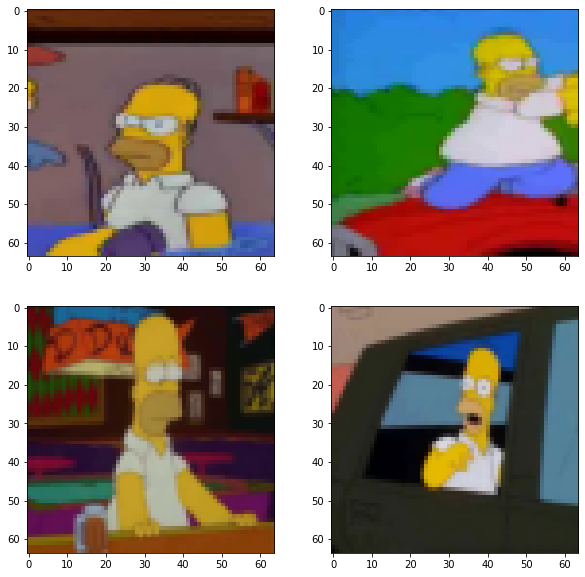

In [5]:
# Show some images from class #2
draw_images(x_train, y_train, 2)

First, you should normalize the data. Apply a normalisation method of your choice that brings the data around 0, to the scale of 0-1.

Note: you may want to convert the datatype of `x_train` and `x_test` to float32 instead of the original uint8. Fractional values are not representable with a `uint8` datatype. [2p]

In [6]:
# ADD YOUR CODE HERE
# IT SHOULD MODIFY x_train, and x_test the same way
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import numpy as np
import os
# ADD YOUR CODE HERE
# IT SHOULD MODIFY x_train, and x_test the same way
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 
x_val = x_val.astype('float32') 
x_train = x_train / 255.0
x_test = x_test / 255.0
x_val = x_val / 255.0

# convert integers to dummy variables (i.e. one hot encoded)
y_train_one_hot = np_utils.to_categorical(y_train)
y_val_one_hot = np_utils.to_categorical(y_val)
y_test_one_hot = np_utils.to_categorical(y_test)


## Training the network

Implement and train the following modified LeNet architecture. It has the following layers:

- A convolutional layer with 5x5 kernel and 8 filters
- An AveragePooling layer
- A convolutional layer with 3x3 kernel and 16 filters
- An AveragePooling layer
- A fully connected layer of 100 units
- A fully connected layer of 60 units
- A fully connected layer with softmax activation, having the same number of units as classes

All layers have ReLU activations. 

How many parameters does this network have? [2p]  
**322,146**

Now train the network for 50 epochs. [6p]

In [7]:
# ADD YOUR CODE HERE
# ADD YOUR CODE HERE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.utils import plot_model

import matplotlib.pyplot as plt
# Define the model

model = Sequential()


model.add(Conv2D(filters=8, kernel_size=(5,5),input_shape=(64,64,3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2,2))) 

# The second convolutional layer
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()),
model.add(Dense(100, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 8)         608       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                6

Now that the model has finished training, plot the accuracy and loss over time, both for the training and the validation data [1p]:

In [8]:
history = model.fit(x_train, y_train_one_hot, epochs=50, validation_data=(x_val, y_val_one_hot))

Epoch 1/50
259/259 [==============================] - 5s 7ms/step - loss: 2.0278 - accuracy: 0.2748 - val_loss: 1.5323 - val_accuracy: 0.5002
Epoch 2/50
259/259 [==============================] - 1s 5ms/step - loss: 1.4374 - accuracy: 0.5300 - val_loss: 1.2659 - val_accuracy: 0.5835
Epoch 3/50
259/259 [==============================] - 1s 5ms/step - loss: 1.1517 - accuracy: 0.6281 - val_loss: 1.0855 - val_accuracy: 0.6476
Epoch 4/50
259/259 [==============================] - 1s 5ms/step - loss: 0.9326 - accuracy: 0.6989 - val_loss: 1.0482 - val_accuracy: 0.6585
Epoch 5/50
259/259 [==============================] - 1s 5ms/step - loss: 0.7782 - accuracy: 0.7430 - val_loss: 0.9830 - val_accuracy: 0.6777
Epoch 6/50
259/259 [==============================] - 1s 5ms/step - loss: 0.6170 - accuracy: 0.7974 - val_loss: 0.9635 - val_accuracy: 0.6929
Epoch 7/50
259/259 [==============================] - 1s 5ms/step - loss: 0.4835 - accuracy: 0.8459 - val_loss: 0.9819 - val_accuracy: 0.7005
Epoch 

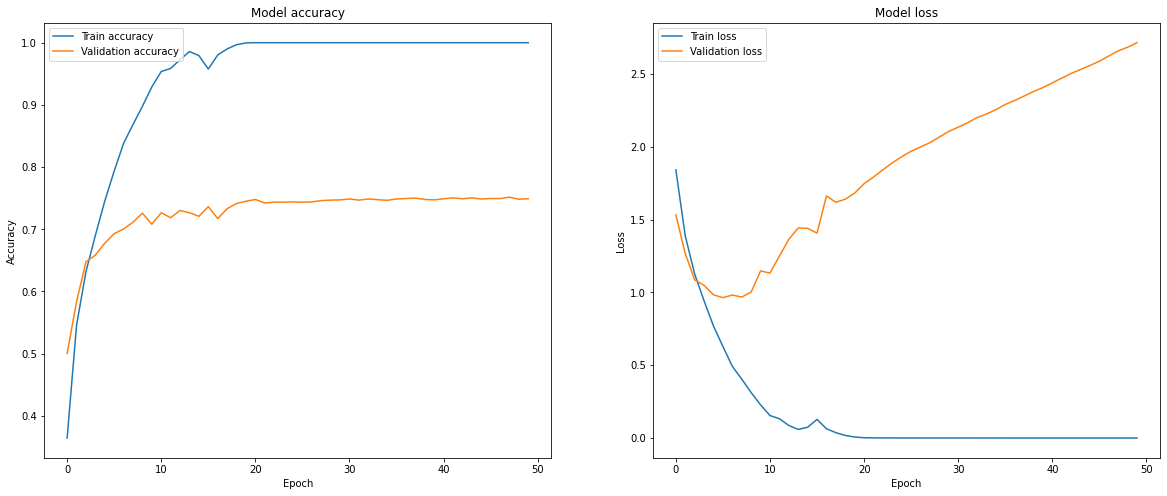

In [9]:
# ADD YOUR CODE HERE
# Plot training & validation accuracy values
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

How did the loss and accuracy curves change over time? What does it mean regarding the training process (i.e. overfit, underfit, etc.)? Is that a problem and how would you solve it? [3p]
 

These plots are characteristic of overfitting. What “overfitting” means is that our neural network has learned a function that performs really well on the training data but when it is shown new data (also called test data) it does not provide correct inference/predictions.

Our training accuracy increases linearly over time, until it reaches nearly 100%, while our validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only 6 epochs then increases, while the training loss keeps decreasing linearly until it reaches nearly 0.

we can use some techniques that can help mitigate overfitting, such as dropout ,,L2 regularization, data augmentation.
Here we will use data augmentation. It is used almost universally when processing images with deep learning models


Finally, calculate the performance of your model on the test set [1p]:

In [10]:
# ADD YOUR CODE HERE

# predict results
loss, acc = model.evaluate(x_test,y_test_one_hot,verbose = 0)

print("Simpson characters were predicted with a loss of {:.5f} and an accuracy of {:.2f}%".format(loss,acc*100))

#Simpson characters were predicted with a loss of 2.72926 and an accuracy of 74.92%

Simpson characters were predicted with a loss of 2.72926 and an accuracy of 74.92%


## Improving the method

Add augmentations to the model, and retrain the network! Plot the training curves as well. [4p]

In [11]:
#data augmentation
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
import keras
from sklearn.model_selection import train_test_split
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    
    rotation_range=40,# randomly rotate images in the range 
    width_shift_range=0.2,   # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2, # randomly shift images vertically (fraction of total height)
    shear_range=0.2, #shear image
    zoom_range=0.2, # Randomly zoom image 
    horizontal_flip=True,  # randomly flip images horizontally
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    vertical_flip=False)  # randomly flip images
epochs = 50
# Batch size
batch_size = 32

history = model.fit(train_datagen.flow(x_train,y_train_one_hot ,
                                       batch_size=batch_size, 
                                      # seed=30,
                                       shuffle=True),
                    epochs=epochs,
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    validation_data=(x_val,y_val_one_hot),
                    verbose=1)

Epoch 1/50
258/258 [==============================] - 10s 39ms/step - loss: 1.9352 - accuracy: 0.3930 - val_loss: 1.1857 - val_accuracy: 0.6067
Epoch 2/50
258/258 [==============================] - 10s 38ms/step - loss: 1.4383 - accuracy: 0.5192 - val_loss: 1.0515 - val_accuracy: 0.6509
Epoch 3/50
258/258 [==============================] - 10s 38ms/step - loss: 1.3142 - accuracy: 0.5604 - val_loss: 0.9200 - val_accuracy: 0.6914
Epoch 4/50
258/258 [==============================] - 10s 38ms/step - loss: 1.2252 - accuracy: 0.5912 - val_loss: 0.9258 - val_accuracy: 0.6903
Epoch 5/50
258/258 [==============================] - 10s 37ms/step - loss: 1.1777 - accuracy: 0.6111 - val_loss: 0.8848 - val_accuracy: 0.7008
Epoch 6/50
258/258 [==============================] - 10s 38ms/step - loss: 1.1186 - accuracy: 0.6227 - val_loss: 0.8420 - val_accuracy: 0.7168
Epoch 7/50
258/258 [==============================] - 10s 38ms/step - loss: 1.0813 - accuracy: 0.6386 - val_loss: 0.7789 - val_accuracy:

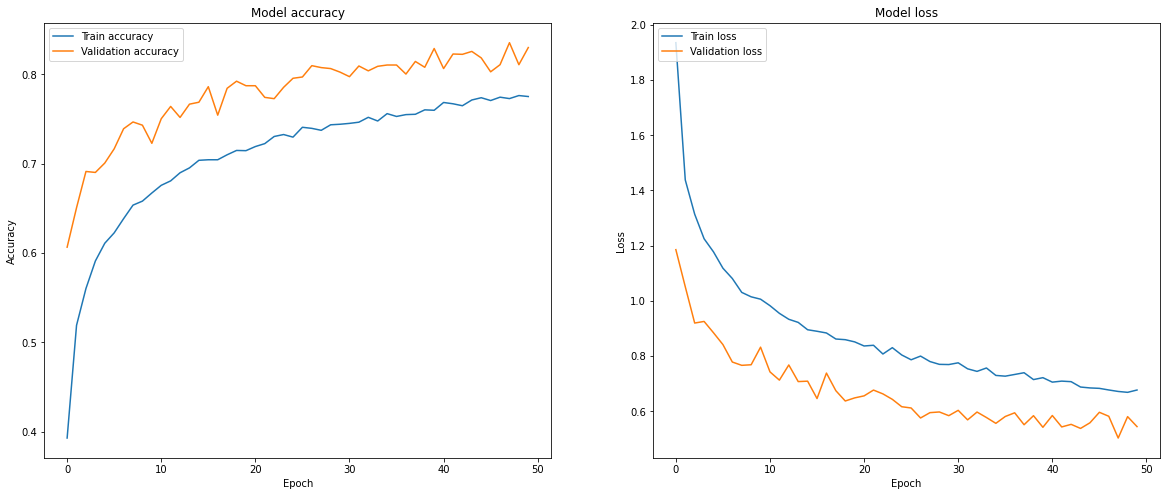

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation accuracy'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train loss', 'Validation loss'], loc='upper left')
plt.show()

In [15]:
# ADD YOUR CODE HERE

# predict results
loss, acc = model.evaluate(x_test,y_test_one_hot,verbose = 0)

print("Simpson characters were predicted with a loss of {:.5f} and an accuracy of {:.2f}%".format(loss,acc*100))
#Simpson characters were predicted with a loss of 0.59054 and an accuracy of 81.82%

Simpson characters were predicted with a loss of 0.59054 and an accuracy of 81.82%


## Conclusions

You have trianed two models (one with augmentations and one without any). Compare their results. Write a couple of sentences which one would you choose and why. [3p]

"Model without any" shows characteristic of overfitting. 
What “overfitting” means is that our neural network has learned a function that performs really well on the training data but when it is shown new data (also called test data) it does not provide correct inference/predictions. In this model Simpson characters were predicted with a loss of 2.72926 and an accuracy of 74.92%

I prefer model with augmentations because this model has better accuracy score and no overfitting also more generalizable model so can predict more accurately.Our validation accuracy increases more than training accuracy and our validation loss decreases more than training loss. In this model Simpson characters were predicted with a loss of 0.59054 and an accuracy of 81.82%